## OneBharat Assignment -2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('P2- OfficeSupplies Data.csv')

In [4]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderDate   43 non-null     object 
 1   Region      43 non-null     object 
 2   Rep         43 non-null     object 
 3   Item        43 non-null     object 
 4   Units       43 non-null     int64  
 5   Unit Price  43 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.1+ KB


In [6]:
df.describe()

,Units,Unit Price
count,43.000000,43.000000
mean,49.325581,20.308605
std,30.078248,47.345118
min,2.000000,1.290000
25%,27.500000,3.990000
50%,53.000000,4.990000
75%,74.500000,17.990000
max,96.000000,275.000000


#### Sales Analysis:

Q1. What are the total sales for each product category?

In [7]:
# Creating a column for sale per item
df['sale'] = df['Unit Price']*df['Units']
df

,OrderDate,Region,Rep,Item,Units,Unit Price,sale
0,04-Jul-14,East,Richard,Pen Set,62,4.99,309.38
1,12-Jul-14,East,Nick,Binder,29,1.99,57.71
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,686.95
3,29-Jul-14,East,Susan,Binder,81,19.99,1619.19
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95,1005.90
5,15-Aug-14,East,Richard,Pencil,35,4.99,174.65
6,24-Aug-14,West,James,Desk,3,275.00,825.00
7,01-Sep-14,Central,Smith,Desk,2,125.00,250.00
8,10-Sep-14,Central,Bill,Pencil,7,1.29,9.03
9,18-Sep-14,East,Richard,Pen Set,16,15.99,255.84


Now we can calculate total sales for each items

In [8]:
# Unique intems in the dataset
df['Item'].unique()

array(['Pen Set', 'Binder', 'Pencil', 'Desk', 'Pen'], dtype=object)

In [9]:
# Sales for each product category:
total_sales = df.groupby('Item')['sale'].sum().reset_index(name='total_sales')
print(total_sales)

      Item  total_sales
0   Binder      9577.65
1     Desk      1700.00
2      Pen      2045.22
3  Pen Set      4169.87
4   Pencil      2135.14


Q2. Which product category has the highest sales?

Binder has the highest sales.

Q3. Identify the top 10 best-selling products.

There are only 5 products in the dataset naming - 'Binder', 'Desk', 'Pen', 'Pen Set', and 'Pencil'.

#### Customer Analysis: 

Q1. Who are the top 10 customers by sales?

In [10]:
total_sales_by_rep = df.groupby('Rep')['sale'].sum().reset_index()

# Top 10 customers:
top_10_customers = total_sales_by_rep.sort_values(by='sale', ascending=False).head(10)

print(top_10_customers)

        Rep     sale
3   Matthew  3109.44
9     Susan  3102.30
0      Alex  2812.19
7   Richard  2363.04
1      Bill  1749.87
8     Smith  1641.43
4    Morgan  1387.77
2     James  1283.61
10   Thomas  1203.11
5      Nick   536.75


Q2. What is the total number of unique customers?

In [11]:
# Total no. of Unique Customers
df['Rep'].unique()

array(['Richard', 'Nick', 'Morgan', 'Susan', 'Matthew', 'James', 'Smith',
       'Bill', 'Thomas', 'Rachel', 'Alex'], dtype=object)

Q3. Analyze customer purchase frequency.

In [12]:
frq = df.groupby('Rep').size()
print(frq)

Rep
Alex       5
Bill       5
James      4
Matthew    4
Morgan     3
Nick       2
Rachel     4
Richard    8
Smith      3
Susan      3
Thomas     2
dtype: int64


#### Time Series Analysis: 

Q1. What are the monthly sales trends over the past year?

Let's first convert the data in year and month format

In [13]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d-%b-%y')

# Extract year and month from OrderDate
df['YearMonth'] = df['OrderDate'].dt.to_period('M')

Now calculating monthly sales

In [14]:
# Monthly Sales
monthly_sales = df.groupby('YearMonth')['sale'].sum().reset_index()

In [15]:
print(monthly_sales)

   YearMonth     sale
0    2014-07  2673.23
1    2014-08  2005.55
2    2014-09   666.11
3    2014-10  1984.57
4    2014-11   833.78
5    2014-12  3288.47
6    2015-01  1602.09
7    2015-02  2044.33
8    2015-03   556.87
9    2015-04  1059.03
10   2015-05  1300.35
11   2015-06  1613.50


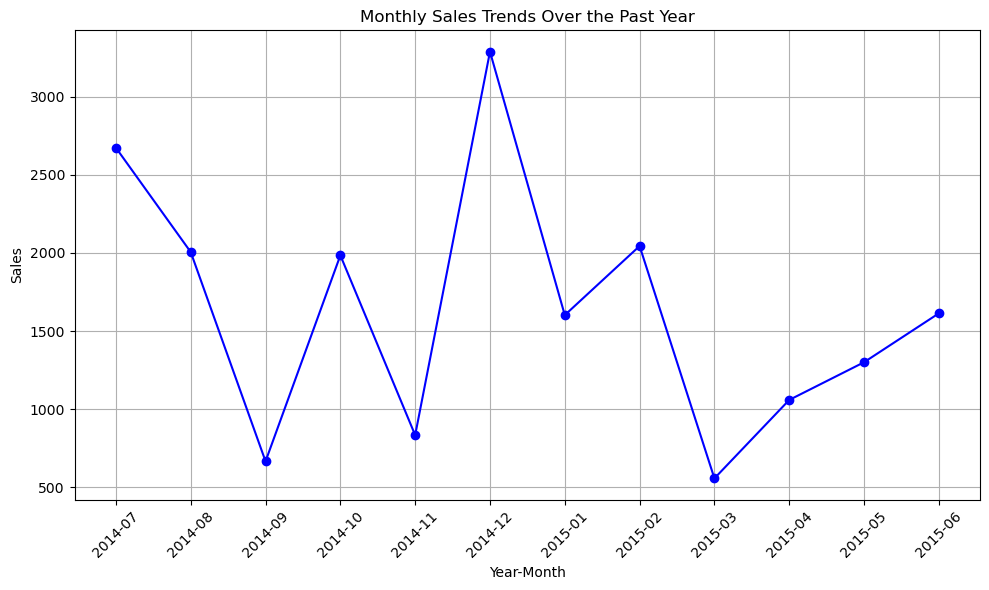

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['sale'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends Over the Past Year')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Peaked in the month of december while March showed the lowest sale.

Q2. Identify any seasonal patterns in the sales data.

#### Geographical Analysis: 

Q1. Which regions generate the most sales?

In [17]:
sale_by_region = df.groupby('Region')['sale'].sum().reset_index()
print(sale_by_region)

    Region      sale
0  Central  11139.07
1     East   6002.09
2     West   2486.72


In [21]:
sale_by_region['sale'].max()

11139.07

Central region has the highest amount of sales - 11139.07

Q2. What are the sales trends across different regions?

In [19]:
#Monthly Sales by region
monthly_sales_region = df.groupby(['YearMonth','Region'])['sale'].sum().unstack('Region')
print(monthly_sales_region)

Region     Central     East     West
YearMonth                           
2014-07     686.95  1986.28      NaN
2014-08    1005.90   174.65   825.00
2014-09     259.03   255.84   151.24
2014-10     269.78   575.36  1139.43
2014-11     533.93   299.85      NaN
2014-12    2105.21  1183.26      NaN
2015-01    1413.04   189.05      NaN
2015-02    2024.37    19.96      NaN
2015-03     249.50      NaN   307.37
2015-04     280.59   778.44      NaN
2015-05    1236.67      NaN    63.68
2015-06    1074.10   539.40      NaN


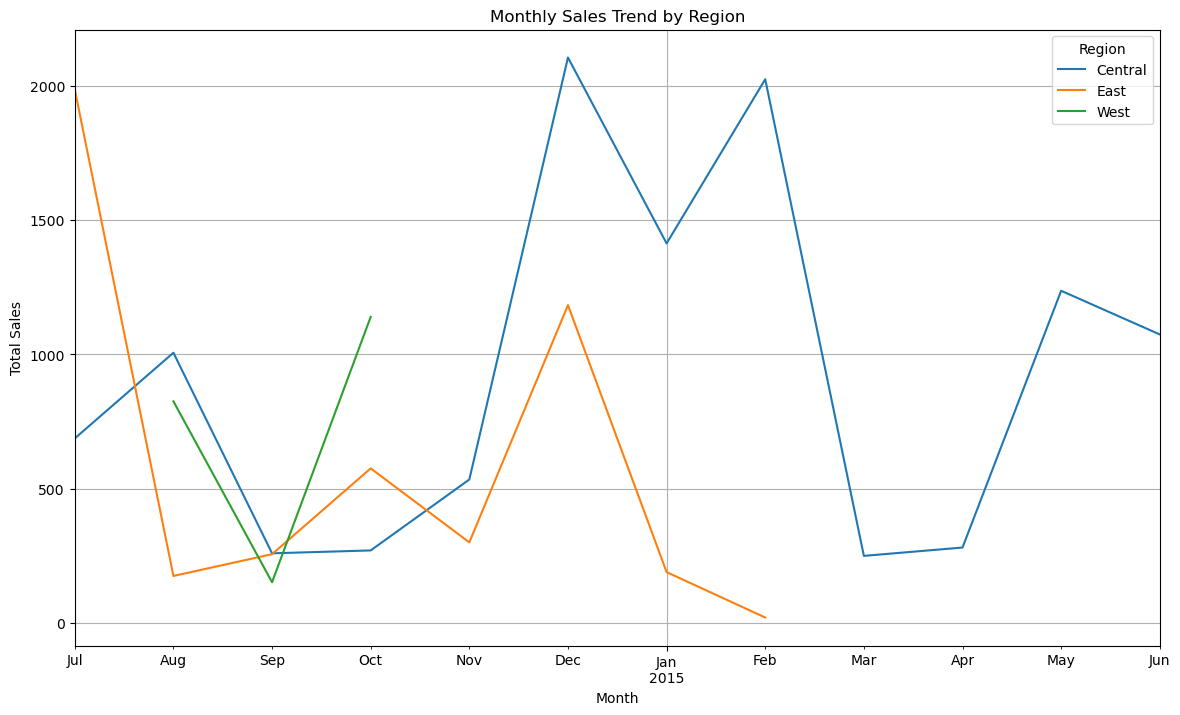

In [20]:
monthly_sales_region.plot(kind='line', figsize=(14, 8))
plt.title('Monthly Sales Trend by Region')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.grid(True)
plt.show()